In [1]:
import os
import sys
import random
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
random.seed(0)

In [3]:
df_training = pd.read_csv('../../datasets/titanic_training_processed.csv')
df_test = pd.read_csv('../../datasets/titanic_test_processed.csv')

In [4]:
df_training.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_3,Pclass_1,Sex_male,TicketPrefix_A/5,...,CabinClass_C,CabinClass_E,CabinClass_G,CabinClass_D,CabinClass_A,CabinClass_B,CabinClass_F,Embarked_S,Embarked_C,Embarked_Q
0,1,0,-0.565419,0.432550,-0.473408,-0.502163,0.902081,-0.565368,0.737281,9.380891,...,-0.266146,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,0.618959,-0.481772,-0.30739
1,2,1,0.663488,0.432550,-0.473408,0.786404,-1.107304,1.766775,-1.354813,-0.106480,...,3.753114,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,-1.613803,2.073341,-0.30739
2,3,1,-0.258192,-0.474279,-0.473408,-0.488580,0.902081,-0.565368,-1.354813,-0.106480,...,-0.266146,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,0.618959,-0.481772,-0.30739
3,4,1,0.433068,0.432550,-0.473408,0.420494,-1.107304,1.766775,-1.354813,-0.106480,...,3.753114,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,0.618959,-0.481772,-0.30739
4,5,0,0.433068,-0.474279,-0.473408,-0.486064,0.902081,-0.565368,0.737281,-0.106480,...,-0.266146,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,0.618959,-0.481772,-0.30739


In [5]:
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_3,Pclass_1,Sex_male,TicketPrefix_A/5,TicketPrefix_PC,...,CabinClass_C,CabinClass_E,CabinClass_G,CabinClass_D,CabinClass_A,CabinClass_B,CabinClass_F,Embarked_S,Embarked_C,Embarked_Q
0,892,0.394665,-0.474279,-0.473408,-0.490508,0.902081,-0.565368,0.737281,-0.10648,-0.268554,...,-0.266146,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,-1.613803,-0.481772,3.249548
1,893,1.354749,0.432550,-0.473408,-0.507194,0.902081,-0.565368,-1.354813,-0.10648,-0.268554,...,-0.266146,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,0.618959,-0.481772,-0.307390
2,894,2.506849,-0.474279,-0.473408,-0.453112,-1.107304,-0.565368,0.737281,-0.10648,-0.268554,...,-0.266146,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,-1.613803,-0.481772,3.249548
3,895,-0.181385,-0.474279,-0.473408,-0.473739,0.902081,-0.565368,0.737281,-0.10648,-0.268554,...,-0.266146,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,0.618959,-0.481772,-0.307390
4,896,-0.565419,0.432550,0.767199,-0.400792,0.902081,-0.565368,-1.354813,-0.10648,-0.268554,...,-0.266146,-0.192901,-0.067116,-0.196006,-0.130783,-0.235849,-0.121613,0.618959,-0.481772,-0.307390


In [6]:
columns = df_training.columns[2:]
X_train = df_training[columns].values
X_test = df_test[columns].values
y_train = df_training['Survived'].values

In [7]:
X_train.shape

(891, 60)

In [8]:
X_test.shape

(418, 60)

In [9]:
y_train.shape

(891,)

In [10]:
logreg = LogisticRegression()

In [11]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_test = logreg.predict(X_test)

In [13]:
submission = df_test.copy()
submission['Survived'] = y_test
submission = submission[['PassengerId', 'Survived']]

In [14]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [15]:
if not os.path.exists('./submissions/'):
    os.makedirs('./submissions/')

In [16]:
submission.to_csv('./submissions/02_logistic_regression.csv', index = False)

My submission to Kaggle produced a 72.72% test prediction accuracy. 

## Feature selection - forward selection

In [17]:
# generating sets for 10-fold cross validation
indexes = list(range(len(df_training)))
random.shuffle(indexes)
folds = []
for i in range(10):
    folds.append([])
for i in range(len(indexes)):
    folds[i % 10].append(indexes[i])

In [18]:
def produce_training_test_set(df_training, train_indexes, test_indexes, column_indexes):
    columns = df_training.columns[column_indexes]
    datasets = {}
    datasets['X_train'] = df_training.iloc[train_indexes][columns].values
    datasets['X_test'] = df_training.iloc[test_indexes][columns].values
    datasets['y_train'] = df_training.iloc[train_indexes]['Survived'].values
    datasets['y_test'] = df_training.iloc[test_indexes]['Survived'].values
    
    return datasets

In [19]:
def evaluate(datasets, C = None):
    if C is None:
        C = 1
    logreg = LogisticRegression(C = C)
    logreg.fit(datasets['X_train'], datasets['y_train'])
    y_pred = logreg.predict(datasets['X_test'])
    return sqrt(np.sum(np.power(np.array(y_pred) - np.array(datasets['y_test']), 2)))

In [20]:
def k_fold_cross_validation(df_training, folds, column_indexes, C = None):
    error = 0
    
    for k in range(10):
        train_indexes = []
        for j in range(10):
            if j == k:
                test_indexes = folds[j]
            else:
                train_indexes = train_indexes + folds[j]
                
        datasets = produce_training_test_set(df_training, train_indexes, test_indexes, column_indexes)
        
        error = error + evaluate(datasets, C)
        
    return error / 10.0

In [21]:
column_indexes = list(range(2, 62))
k_fold_cross_validation(df_training, folds, column_indexes)

4.263014203517338

In [22]:
# Forward selection
pending = list(range(2, 62))
model = []
min_error = sys.float_info.max
while len(pending) > 0:
    
    prev_error = min_error
    min_error = sys.float_info.max
    
    for i in pending:
        new_model = model + [i]
        error = k_fold_cross_validation(df_training, folds, new_model)
        
        if error < min_error:
            min_error = error
            best_model = new_model
            feature = i
            
    if min_error < prev_error:
        print('Selecting feature ' + df_training.columns[feature] + ' - error decreased to ' + str(min_error))
        model = best_model
        pending.remove(feature)
    else:
        print('END')
        break

Selecting feature Sex_male - error decreased to 4.328105960328346
Selecting feature TicketPrefix_W./C. - error decreased to 4.281406102952756
Selecting feature SibSp - error decreased to 4.23599879067807
Selecting feature Pclass_3 - error decreased to 4.153504196089814
Selecting feature Age - error decreased to 4.132343766397408
Selecting feature CabinClass_E - error decreased to 4.079869492473408
Selecting feature TicketPrefix_S.O.C. - error decreased to 4.064489895129577
Selecting feature Embarked_Q - error decreased to 4.040744255754691
Selecting feature TicketPrefix_SC/Paris - error decreased to 4.028433693192925
Selecting feature CabinClass_C - error decreased to 4.017109992047034
Selecting feature TicketPrefix_W.E.P. - error decreased to 4.01472312289314
Selecting feature CabinClass_F - error decreased to 4.014292192329051
Selecting feature TicketPrefix_SW/PP - error decreased to 4.013383246577314
Selecting feature TicketPrefix_S.W./PP - error decreased to 4.000681581198056
END


In [23]:
model_forward = model
columns = df_training.columns[model_forward]
X_train = df_training[columns].values
X_test = df_test[columns].values
y_train = df_training['Survived'].values

In [24]:
logreg = LogisticRegression()

In [25]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_test = logreg.predict(X_test)

In [27]:
submission = df_test.copy()
submission['Survived'] = y_test
submission = submission[['PassengerId', 'Survived']]

In [28]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
submission.to_csv('./submissions/02_logistic_regression_forward_selection.csv', index = False)

This submission produced a 75.119% test prediction accuracy

## Feature selection - bakward elimination

In [30]:
# backward elimination
model = list(range(2, 62))
min_error = k_fold_cross_validation(df_training, folds, column_indexes)
while len(model) > 0:
    
    prev_error = min_error
    min_error = sys.float_info.max
    
    for i in model:
        new_model = model[:]
        new_model.remove(i)
        error = k_fold_cross_validation(df_training, folds, new_model)
        
        if error < min_error:
            min_error = error
            best_model = new_model
            feature = i
            
    if min_error < prev_error:
        print('Removing feature ' + df_training.columns[feature] + ' - error decreased to ' + str(min_error))
        model = best_model
    else:
        print('END')
        break

Removing feature TicketPrefix_WE/P - error decreased to 4.238001975576314
Removing feature TicketPrefix_SC/AH - error decreased to 4.211783256070852
Removing feature TicketPrefix_S.C./PARIS - error decreased to 4.180509295399347
Removing feature TicketPrefix_STON/O2. - error decreased to 4.157511815253558
Removing feature CabinClass_B - error decreased to 4.143901204122563
Removing feature TicketPrefix_CA. - error decreased to 4.132577502976672
Removing feature TicketPrefix_A/5 - error decreased to 4.120951677334533
Removing feature Pclass_1 - error decreased to 4.110410100985605
Removing feature Parch - error decreased to 4.084986728254289
Removing feature TicketPrefix_F.C.C. - error decreased to 4.073842100076087
Removing feature TicketPrefix_P/PP - error decreased to 4.052175303014539
Removing feature TicketPrefix_SOTON/OQ - error decreased to 4.0398647404527726
Removing feature TicketPrefix_S.O.C. - error decreased to 4.039817243707889
Removing feature TicketPrefix_STON/O - error d

Backward eliminiation seems to reduce the prediction error for the training set even more. Let's make a submission

In [31]:
model_backward = model
columns = df_training.columns[model_backward]
X_train = df_training[columns].values
X_test = df_test[columns].values
y_train = df_training['Survived'].values

In [32]:
logreg = LogisticRegression()

In [33]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_test = logreg.predict(X_test)

In [35]:
submission = df_test.copy()
submission['Survived'] = y_test
submission = submission[['PassengerId', 'Survived']]

In [36]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [37]:
submission.to_csv('./submissions/02_logistic_regression_backward_elimination.csv', index = False)

This submission produced 73.205% prediction accuracy for the test set. Therefore, we should keep forward selection. 

## Model selection - regularisation

The only parameter worth playing with is the regularisation factor C.

In [38]:
column_indexes = model_forward

In [39]:
C = np.arange(0.01, 1.5, 0.01)
rmses = []
for c in C:
    rmses.append(k_fold_cross_validation(df_training, folds, new_model, c))

Text(0.5,1,'Regularisation factor - model selection')

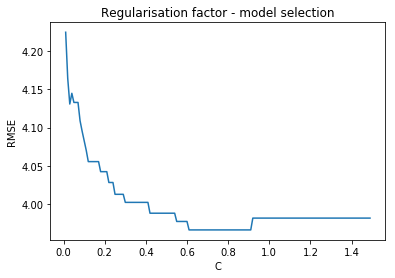

In [40]:
fig, ax = plt.subplots()
ax.plot(C, rmses)
ax.set_xlabel('C')
ax.set_ylabel('RMSE')
ax.set_title('Regularisation factor - model selection')

Minimum seems to be at 0.7

In [41]:
columns = df_training.columns[model_forward]
X_train = df_training[columns].values
X_test = df_test[columns].values
y_train = df_training['Survived'].values

In [42]:
logreg = LogisticRegression(C = 0.7)

In [43]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_test = logreg.predict(X_test)

In [45]:
submission = df_test.copy()
submission['Survived'] = y_test
submission = submission[['PassengerId', 'Survived']]

In [46]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [47]:
submission.to_csv('./submissions/02_logistic_regression_regularisation.csv', index = False)

I obtained exactly the same test accuracy after my submission than in the case of not using regularisation.